Este notebook foi executado pelo Google Colaboratory. Para executá-lo, clone o repositório para um diretório em seu Google Drive, conecte o notebook com o drive `drive.mount('/content/drive')` e localize o repositório já clonado `%cd /content/drive/.../PAC/cnn`.

# Localizando repositório

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/PAC

/content/drive/MyDrive/Github/PAC


# Inicializando

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.losses import BinaryCrossentropy
from src.metrics import *
from src.data import load_dataset
from src.segmentation import UNet
from src.visualize import set_custom_style, plot_training
set_custom_style()

In [ ]:
%%time
dataset = load_dataset(grayscale=True, augmentation=True, norm=True)

CPU times: user 2.29 s, sys: 653 ms, total: 2.94 s
Wall time: 29.8 s


# Treinamento

In [ ]:
unet = UNet('unet-dice_topk_30-32_64', dataset).build((32, 64))
unet.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss= DiceTopK(0.3, (256, 256)),
    metrics= [binary_crossentropy, IoU, area_mape]
)

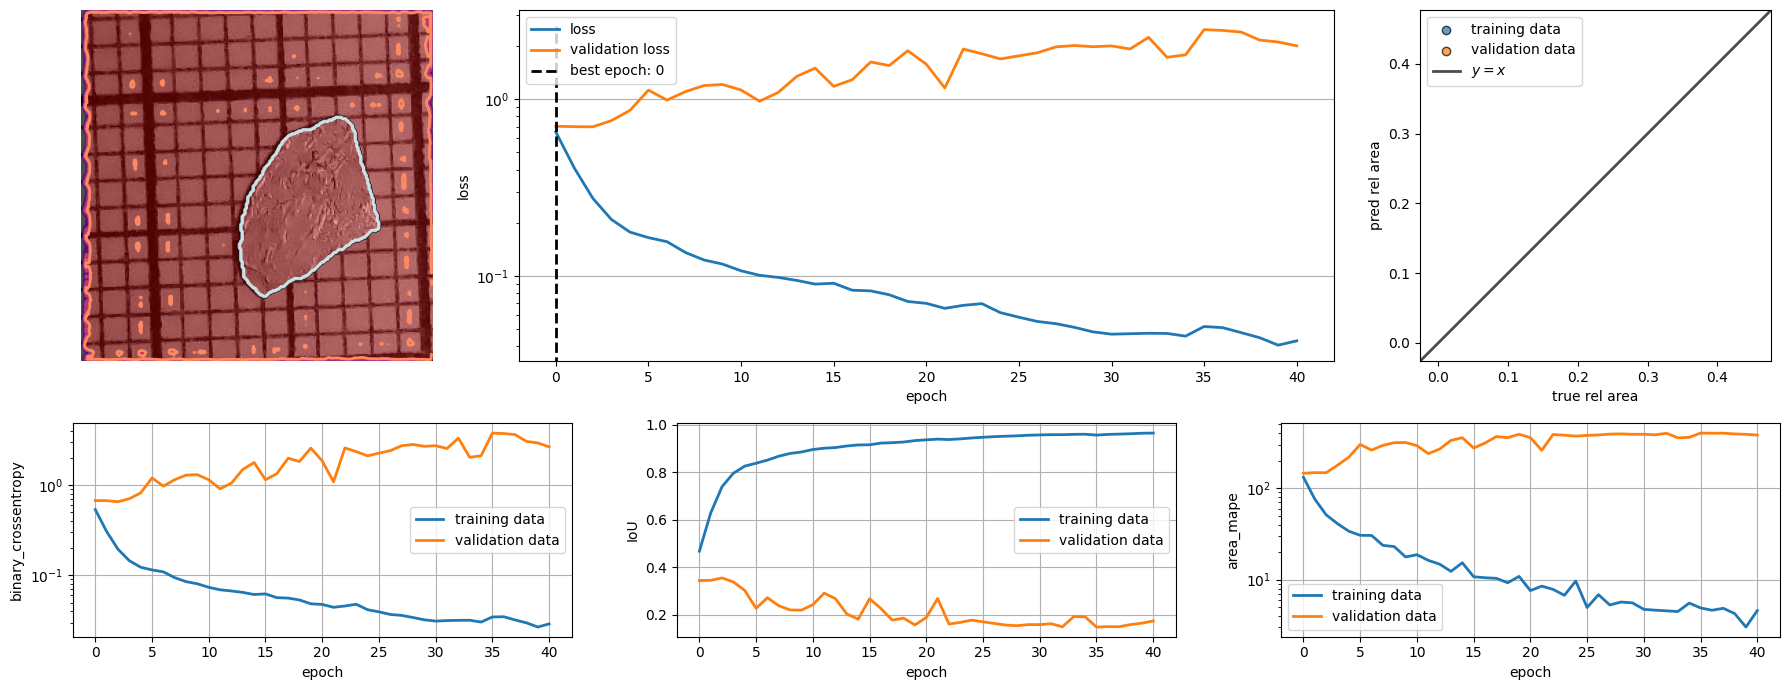

,epoch,IoU,area_mape,binary_crossentropy,loss,val_IoU,val_area_mape,val_binary_crossentropy,val_loss
0,0,0.467428,131.727112,0.533924,0.651669,0.343476,145.849396,0.671295,0.702386
2,2,0.739869,51.192799,0.194465,0.274621,0.354549,147.890808,0.651891,0.697622
1,1,0.628883,75.989006,0.305028,0.407286,0.344407,148.261765,0.669305,0.699033
3,3,0.796252,40.956390,0.144967,0.208696,0.337624,178.697510,0.703376,0.756083
4,4,0.826309,33.885220,0.122876,0.177074,0.301860,218.938019,0.816961,0.863771
11,11,0.901775,16.271181,0.069072,0.100887,0.290349,239.323456,0.904257,0.973426
21,21,0.940118,8.502929,0.044247,0.065624,0.267601,259.962006,1.082799,1.156312
6,6,0.851678,30.467907,0.109193,0.156315,0.271129,261.487366,0.970041,0.987597
12,12,0.904504,14.775400,0.067066,0.098173,0.266822,268.144592,1.049428,1.090040
15,15,0.916178,10.761348,0.062260,0.090987,0.266631,275.779816,1.142187,1.181239


7/7 [==============================] - 341s 51s/step - loss: 0.0430 - binary_crossentropy: 0.0290 - IoU: 0.9655 - area_mape: 4.5929 - val_loss: 2.0010 - val_binary_crossentropy: 2.6373 - val_IoU: 0.1731 - val_area_mape: 381.5092
Epoch 42/1000
7/7 [==============================] - 238s 34s/step - loss: 0.0406 - binary_crossentropy: 0.0270 - IoU: 0.9661 - area_mape: 3.2823 - val_loss: 1.6968 - val_binary_crossentropy: 1.9790 - val_IoU: 0.2193 - val_area_mape: 348.8504
Epoch 43/1000
7/7 [==============================] - 238s 34s/step - loss: 0.0375 - binary_crossentropy: 0.0249 - IoU: 0.9685 - area_mape: 4.3559 - val_loss: 1.7006 - val_binary_crossentropy: 1.9753 - val_IoU: 0.2139 - val_area_mape: 350.6799
Epoch 44/1000
7/7 [==============================] - 236s 34s/step - loss: 0.0372 - binary_crossentropy: 0.0246 - IoU: 0.9687 - area_mape: 4.2343 - val_loss: 1.4009 - val_binary_crossentropy: 1.4000 - val_IoU: 0.2875 - val_area_mape: 295.5313
Epoch 45/1000
7/7 [=======================

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f913d42d678e>", line 1, in <cell line: 1>
    history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)
  File "/content/drive/MyDrive/Github/PAC/src/segmentation.py", line 172, in fit
    ]
  File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.9/dist-packages/tensorflow/python/lib/io/file_io.py", line 221, in flush
    self._writable_file.flush()
tensorflow.python.framework.errors_impl.FailedPreconditionError: models/unet-dice_topk_30-32_64/logs.csv; Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/p

In [ ]:
history = unet.fit(1000, unet.x_train.shape[0]//6, plot=True, period=20, ranking=10)

In [ ]:
from src.config import Paths

[]

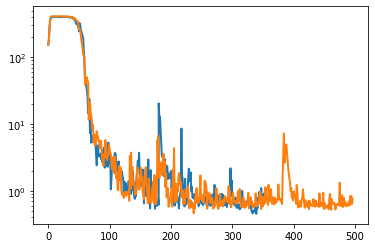

In [ ]:
for unet_path in Paths.models.glob('unet*'):
    unet = UNet(unet_path.name, dataset).load(compile=False) #.build((16, 32, 64))
    logs = unet.get_logs()
    plt.plot(logs.epoch, logs.val_area_mape)
plt.semilogy()